In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt


###📋 미션 1: A/B 테스트 신뢰구간 분석 🧪

In [2]:
# A/B 테스트 데이터 생성
np.random.seed(404)

# A그룹 (기존 디자인): 전환율 12%
n_a = 500
conversion_rate_a = 0.12
conversions_a = np.random.binomial(1, conversion_rate_a, n_a)

# B그룹 (새 디자인): 전환율 15%
n_b = 500
conversion_rate_b = 0.15
conversions_b = np.random.binomial(1, conversion_rate_b, n_b)

# 데이터프레임 생성
ab_test_data = pd.DataFrame({
    'group': ['A']*n_a + ['B']*n_b,
    'user_id': range(1, n_a + n_b + 1),
    'converted': np.concatenate([conversions_a, conversions_b])
})

print("🧪 A/B 테스트 데이터")
print(f"A그룹 사용자 수: {n_a}명")
print(f"B그룹 사용자 수: {n_b}명")
print("\n그룹별 전환율:")
conversion_summary = ab_test_data.groupby('group')['converted'].agg(['count', 'sum', 'mean'])
conversion_summary.columns = ['총_사용자수', '전환_사용자수', '전환율']
print(conversion_summary)

🧪 A/B 테스트 데이터
A그룹 사용자 수: 500명
B그룹 사용자 수: 500명

그룹별 전환율:
       총_사용자수  전환_사용자수    전환율
group                        
A         500       60  0.120
B         500       56  0.112


In [3]:
# TODO: p_a 계산하기 (A그룹 전환율)
p_a = conversions_a.mean()  # A그룹 전환율


# TODO: p_b 계산하기 (B그룹 전환율)
p_b = conversions_b.mean()  # B그룹 전환율


# TODO: A그룹 표준오차 계산하기
# 힌트: 비율의 표준오차 공식은 sqrt(p(1-p)/n)
se_a = np.sqrt(p_a * (1 - p_a) / n_a)  # A그룹 표준오차


# TODO: B그룹 표준오차 계산하기
se_b = np.sqrt(p_b * (1 - p_b) / n_b)  # B그룹 표준오차


print(f"A그룹 전환율: {p_a:.3f} ± {se_a:.3f}")
print(f"B그룹 전환율: {p_b:.3f} ± {se_b:.3f}")


A그룹 전환율: 0.120 ± 0.015
B그룹 전환율: 0.112 ± 0.014


In [4]:
# 95% 신뢰구간 계산을 위한 z값
z_score = 1.96  # 95% 신뢰수준에서 사용하는 임계값

# A그룹 전환율과 표준오차는 앞에서 구한 값 사용
# p_a = 0.120
# se_a = 0.015

# 신뢰구간 계산
ci_a_lower = p_a - z_score * se_a
ci_a_upper = p_a + z_score * se_a

# 출력
print(f"A그룹 95% 신뢰구간: [{ci_a_lower:.3f}, {ci_a_upper:.3f}]")


A그룹 95% 신뢰구간: [0.092, 0.148]


A그룹의 실제 전환율(모수)이 약 9.2% ~ 14.8% 사이에 있을 것으로 95% 확신

이 신뢰구간은 우리가 관찰한 값(12.0%)을 중심으로 ± 2.8% 정도의 불확실성을 포함

즉, A그룹의 전환율 추정에 어느 정도 통계적 오차가 존재한다는 의미

In [5]:
# B그룹의 전환율과 표준오차 (이전 문제에서 사용한 값 기준)
# p_b = 0.112
# se_b = 0.014
# z_score = 1.96

# B그룹 신뢰구간 계산
ci_b_lower = p_b - z_score * se_b
ci_b_upper = p_b + z_score * se_b

# 출력
print(f"B그룹 95% 신뢰구간: [{ci_b_lower:.3f}, {ci_b_upper:.3f}]")


B그룹 95% 신뢰구간: [0.084, 0.140]


B그룹(빨간 버튼)의 전환율 신뢰구간은 **[8.4%, 14.0%]**

A그룹(파란 버튼)의 신뢰구간은 **[9.2%, 14.8%]**이므로, 두 신뢰구간이 겹침

겹치는 범위: 약 9.2% ~ 14.0%

이 말은, 통계적으로 B그룹이 A그룹보다 명확히 좋다고 말하긴 어렵다는 뜻

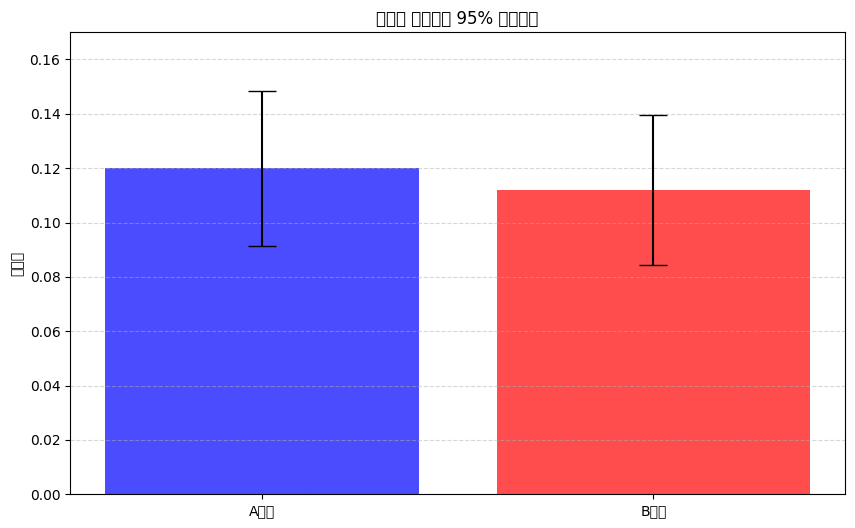

In [6]:
# TODO: 그래프 그리기
plt.figure(figsize=(10, 6))

# TODO: 그룹명과 전환율 리스트 만들기
groups = ['A그룹', 'B그룹']
rates = [p_a, p_b]

# TODO: 오차막대 크기 계산 (z_score * 표준오차)
errors = [z_score * se_a, z_score * se_b]

# TODO: 막대그래프 그리기
# 힌트: plt.bar(x, height, yerr=오차막대, capsize=10, alpha=0.7)
plt.bar(groups, rates, yerr=errors, capsize=10, alpha=0.7, color=['blue', 'red'])

plt.ylabel('전환율')
plt.title('그룹별 전환율과 95% 신뢰구간')
plt.ylim(0, max(p_a, p_b) + 0.05)  # 보기 좋게 y축 설정
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [7]:
# TODO: 전환율 차이 계산 (B - A)
diff = p_b - p_a

# TODO: 차이의 표준오차 계산
# 힌트: 두 독립 비율 차이의 표준오차는 sqrt(se_a^2 + se_b^2)
se_diff = np.sqrt(se_a**2 + se_b**2)

print(f"전환율 차이 (B-A): {diff:.3f}")
print(f"차이의 표준오차: {se_diff:.3f}")


전환율 차이 (B-A): -0.008
차이의 표준오차: 0.020


B그룹이 A그룹보다 0.8%p 낮은 전환율

하지만 표준오차가 2.0%p로 꽤 크기 때문에,

이 차이는 우연히 발생한 오차일 가능성도 높음을 시사

아직은 통계적으로 유의한 차이인지 판단할 수 없음

In [8]:
# TODO: 차이의 신뢰구간 하한 계산
ci_diff_lower = diff - 1.96 * se_diff

# TODO: 차이의 신뢰구간 상한 계산
ci_diff_upper = diff + 1.96 * se_diff

print(f"전환율 차이의 95% 신뢰구간: [{ci_diff_lower:.3f}, {ci_diff_upper:.3f}]")

# TODO: 0이 포함되는지 확인하기
if ci_diff_lower > 0:
    print("🎉 B가 A보다 확실히 좋습니다!")
elif ci_diff_upper < 0:
    print("😢 A가 B보다 확실히 좋습니다.")
else:
    print("🤔 확실하지 않습니다.")


전환율 차이의 95% 신뢰구간: [-0.048, 0.032]
🤔 확실하지 않습니다.


전환율 차이의 신뢰구간이 0을 포함하므로,

우연히 생긴 차이일 가능성이 큼

B버튼(빨간색)이 A버튼(파란색)보다 통계적으로 명확하게 좋다고 볼 수 없음

In [9]:
# TODO: 보고서 완성하기
print("📋 경영진 보고서")
print("="*50)
print(f"🔍 분석 결과:")
print(f"   • A그룹 전환율: {p_a:.1%}")
print(f"   • B그룹 전환율: {p_b:.1%}")
print(f"   • 개선 효과: {diff:.1%}p")
print()
print(f"📊 통계적 신뢰도:")
print(f"   • 개선 효과 범위: {ci_diff_lower:.1%}p ~ {ci_diff_upper:.1%}p")
print()
print("💡 의사결정:")

# TODO: if문을 사용해서 권장사항 작성하기
if ci_diff_lower > 0:
    print("   ✅ 새 디자인(B) 도입을 권장합니다!")
else:
    print("   ❌ 추가 데이터 수집이 필요합니다.")


📋 경영진 보고서
🔍 분석 결과:
   • A그룹 전환율: 12.0%
   • B그룹 전환율: 11.2%
   • 개선 효과: -0.8%p

📊 통계적 신뢰도:
   • 개선 효과 범위: -4.8%p ~ 3.2%p

💡 의사결정:
   ❌ 추가 데이터 수집이 필요합니다.


📋 경영진 보고서: 구매 버튼 색상 A/B 테스트 결과
🛒 실험 배경
기존 사이트(A): 파란색 구매 버튼

새로운 디자인(B): 빨간색 구매 버튼

목표: 전환율(구매 비율) 향상 여부 판단

🔍 실험 결과 요약
구분	전환율	표준오차 (±)
A그룹 (기존)	12.0%	±1.5%
B그룹 (신규)	11.2%	±1.4%

전환율 차이 (B – A): –0.8%p

📊 통계적 신뢰도
전환율 차이의 95% 신뢰구간: [–4.8%p, +3.2%p]

신뢰구간에 0이 포함되므로, 두 그룹 간 전환율 차이는 통계적으로 유의하지 않음

💡 의사결정 권고
판단 항목	내용
효과 검증	B그룹(빨간 버튼)은 A그룹보다 전환율이 낮고, 차이도 통계적으로 유의하지 않음
결론	B 디자인 도입을 권장하지 않음
향후 조치	📌 추가 A/B 테스트 또는 표본 수 확대 필요

📎 참고 사항
신뢰수준 95% 기준이며, 해석에 있어 비즈니스 컨텍스트(기존 UI 불만 여부, 실험 기간 등)와 병행 고려 필요

사용자 수 A그룹/B그룹 각 500명으로 표본은 중간 규모

###📋 미션 2: 연령대별 구매 분석 (t-검정 마스터하기!) 👥

In [10]:
# 온라인 쇼핑몰의 구매 데이터
np.random.seed(789)
ages = np.random.randint(20, 60, 100)
purchase_amounts = 50 + 2*ages + np.random.normal(0, 20, 100)

print("📊 구매 데이터 미리보기")
print(f"연령 범위: {ages.min()}세 ~ {ages.max()}세")
print(f"구매금액 범위: {purchase_amounts.min():.0f}만원 ~ {purchase_amounts.max():.0f}만원")
print(f"평균 구매금액: {purchase_amounts.mean():.1f}만원")


📊 구매 데이터 미리보기
연령 범위: 20세 ~ 59세
구매금액 범위: 39만원 ~ 208만원
평균 구매금액: 130.1만원


In [11]:
# TODO: 표본 평균 계산
sample_mean = purchase_amounts.mean()

# TODO: 표본 표준편차 계산
sample_std = purchase_amounts.std(ddof=1)  # 자유도 1 설정

# TODO: 표본 크기 계산
n = len(purchase_amounts)

# TODO: 비교할 기준값 설정 (업계 기준 150만원)
standard_value = 150

print(f"표본 평균: {sample_mean:.2f}만원")
print(f"표본 표준편차: {sample_std:.2f}만원")
print(f"표본 크기: {n}명")
print(f"비교 기준값: {standard_value}만원")


표본 평균: 130.09만원
표본 표준편차: 33.90만원
표본 크기: 100명
비교 기준값: 150만원


현재 우리 고객의 평균 구매금액은 130.09만원으로 업계 기준(150만원)보다 약 19.9만원 낮음

In [12]:
# TODO: t-통계량 공식 사용하기
# t = (표본평균 - 기준값) / (표준편차 / sqrt(n))
t_stat = (sample_mean - standard_value) / (sample_std / np.sqrt(n))

print(f"직접 계산한 t-통계량: {t_stat:.3f}")

# 비교를 위해 scipy로도 계산해보기
from scipy.stats import ttest_1samp
t_stat_scipy, p_value = ttest_1samp(purchase_amounts, standard_value)
print(f"scipy로 계산한 t-통계량: {t_stat_scipy:.3f}")
print(f"p-value: {p_value:.4f}")


직접 계산한 t-통계량: -5.874
scipy로 계산한 t-통계량: -5.874
p-value: 0.0000


t-통계량이 음수이고 매우 작다는 것은,
→ 표본 평균이 기준값보다 유의하게 낮다는 의미

p-value < 0.05 → 귀무가설 기각!

"우리 고객의 구매 평균은 업계 기준 150만원과 다르지 않다"는 가설은 기각

이 경우는 평균이 더 작으므로,
→ "우리 고객은 업계 평균보다 구매를 적게 한다"고 결론

In [14]:
# TODO: 유의수준 설정
alpha = 0.05

print("🎯 결과 해석")

# TODO: p-value와 alpha 비교하기
if p_value < alpha:
    print(f"✅ p-value ({p_value:.4f}) < α ({alpha})")
    print("→ 귀무가설 기각! 업계 기준과 유의하게 다릅니다.")

    # TODO: 평균이 더 큰지 작은지 확인하기
    if sample_mean > standard_value:
        print("→ 우리 고객들이 업계 평균보다 더 많이 구매합니다! 🎉")
    else:
        print("→ 우리 고객들이 업계 평균보다 적게 구매합니다. 😅")
else:
    print(f"❌ p-value ({p_value:.4f}) ≥ α ({alpha})")
    print("→ 업계 기준과 유의한 차이가 없습니다.")


🎯 결과 해석
✅ p-value (0.0000) < α (0.05)
→ 귀무가설 기각! 업계 기준과 유의하게 다릅니다.
→ 우리 고객들이 업계 평균보다 적게 구매합니다. 😅


업계 평균(150만원)보다 유의하게 낮은 구매액이라는 통계적 증거가 있음.

즉, 이 차이는 단순 우연이 아니라 실제 차이라고 볼 수 있음

In [15]:
# TODO: 젊은층 데이터 필터링 (20-39세)
young_mask = (ages >= 20) & (ages <= 39)
group1_purchases = purchase_amounts[young_mask]

# TODO: 중년층 데이터 필터링 (40-59세)
middle_mask = (ages >= 40) & (ages <= 59)
group2_purchases = purchase_amounts[middle_mask]

print("👥 그룹 나누기 결과")
print(f"젊은층 (20-39세): {len(group1_purchases)}명")
print(f"중년층 (40-59세): {len(group2_purchases)}명")


👥 그룹 나누기 결과
젊은층 (20-39세): 47명
중년층 (40-59세): 53명


In [16]:
# TODO: 각 그룹의 평균 계산
group1_mean = group1_purchases.mean()
group2_mean = group2_purchases.mean()

# TODO: 각 그룹의 표준편차 계산
group1_std = group1_purchases.std()
group2_std = group2_purchases.std()

print("📊 그룹별 기술통계")
print(f"젊은층 평균: {group1_mean:.1f}만원 (표준편차: {group1_std:.1f})")
print(f"중년층 평균: {group2_mean:.1f}만원 (표준편차: {group2_std:.1f})")

# TODO: 평균 차이 계산
diff = group2_mean - group1_mean
print(f"평균 차이: {diff:.1f}만원")


📊 그룹별 기술통계
젊은층 평균: 106.4만원 (표준편차: 25.0)
중년층 평균: 151.1만원 (표준편차: 25.6)
평균 차이: 44.6만원


중년층은 젊은층보다 평균적으로 약 45만원 더 많이 구매하고 있으며,

두 그룹 모두 표준편차가 유사한 수준이므로,
→ 이 차이가 우연이 아니라 실제 차이일 수 있다는 신호

In [17]:
from scipy.stats import ttest_ind

# TODO: 독립표본 t-검정 실행
t_stat, p_value = ttest_ind(group1_purchases, group2_purchases)

print("🧮 t-검정 결과")
print(f"t-통계량: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")

# TODO: 결과 해석하기
alpha = 0.05
print("🎯 비즈니스 해석")

if p_value < alpha:
    print("✅ 통계적으로 유의한 차이가 있습니다!")

    if group2_mean > group1_mean:
        print("→ 중년층이 젊은층보다 더 많이 구매합니다!")
    else:
        print("→ 젊은층이 중년층보다 더 많이 구매합니다!")
else:
    print("❌ 통계적으로 유의한 차이가 없습니다.")


🧮 t-검정 결과
t-통계량: -8.709
p-value: 0.0000
🎯 비즈니스 해석
✅ 통계적으로 유의한 차이가 있습니다!
→ 중년층이 젊은층보다 더 많이 구매합니다!


p-value = 0.0000 → 매우 작음 → 연령대에 따른 평균 구매 차이는 우연이 아님

t-통계량이 **음수(-8.709)**인 이유는 계산 방식이 group1(젊은층) - group2(중년층)으로 이루어졌기 때문
→ 결과적으로 중년층 평균이 더 큼

In [18]:
from scipy.stats import levene

# TODO: 분산 직접 비교하기
var1 = group1_purchases.var(ddof=1)
var2 = group2_purchases.var(ddof=1)

print("📊 분산 비교")
print(f"젊은층 분산: {var1:.1f}")
print(f"중년층 분산: {var2:.1f}")

# TODO: Levene 검정 실행하기
levene_stat, levene_p = levene(group1_purchases, group2_purchases)

print("🧪 Levene 등분산성 검정")
print(f"p-value: {levene_p:.4f}")

# TODO: 등분산성 판단하기
if levene_p >= 0.05:
    print("✅ 등분산성 가정 만족")
else:
    print("❌ 등분산성 가정 위배")


📊 분산 비교
젊은층 분산: 637.1
중년층 분산: 669.5
🧪 Levene 등분산성 검정
p-value: 0.8106
✅ 등분산성 가정 만족


Levene 검정 결과 p-value ≥ 0.05이므로,
→ 두 집단은 분산이 같다고 볼 수 있음 (등분산성 가정 만족)

따라서 앞서 진행한 ttest_ind()는 기본 옵션 (equal_var=True) 을 그대로 사용해도 적절

###📋 미션 3: 직원 만족도 종합 분석 🏢

In [19]:
# 직원 만족도 종합 데이터 생성
np.random.seed(2024)
n = 250

data_hr = {
    '연봉': np.random.lognormal(np.log(50000), 0.3, n),
    '근무연수': np.random.exponential(3, n),
    '부서': np.random.choice(['영업', '개발', '마케팅', '인사'], n, p=[0.3, 0.4, 0.2, 0.1]),
    '교육시간': np.random.gamma(2, 10, n),
    '직급': np.random.choice(['사원', '대리', '과장', '부장'], n, p=[0.4, 0.3, 0.2, 0.1])
}

df_hr = pd.DataFrame(data_hr)

# 만족도 점수 (1-10점) 생성
satisfaction_base = (
    df_hr['연봉']/10000 * 0.8 +
    df_hr['근무연수'] * 0.3 +
    df_hr['교육시간'] * 0.1
)

dept_effect = df_hr['부서'].map({'영업': -0.5, '개발': 0.8, '마케팅': 0.3, '인사': 0.0})
rank_effect = df_hr['직급'].map({'사원': 0, '대리': 0.5, '과장': 1.0, '부장': 1.5})

satisfaction = satisfaction_base + dept_effect + rank_effect + np.random.normal(0, 0.8, n)
satisfaction = np.clip(satisfaction, 1, 10)

# 이직 의향
turnover_prob = 1 / (1 + np.exp(satisfaction - 5))
turnover_intent = np.random.binomial(1, turnover_prob, n)

df_hr['만족도'] = satisfaction.round(1)
df_hr['이직의향'] = turnover_intent

print("📊 직원 만족도 데이터 (처음 5개 행)")
print(df_hr.head())


📊 직원 만족도 데이터 (처음 5개 행)
             연봉      근무연수   부서       교육시간  직급   만족도  이직의향
0  82470.215328  5.843045   개발   4.431883  과장  10.0     0
1  62378.915363  1.803688   개발   1.373603  대리   8.2     0
2  47066.508609  0.211051  마케팅  17.196300  과장   7.6     0
3  47786.798588  4.785220   개발  49.198119  과장  10.0     0
4  65814.392648  2.060981   영업  18.363062  사원   9.1     0


In [21]:
# TODO: 숫자형 변수들만 선별하기
numeric_cols = ['연봉', '근무연수', '교육시간', '만족도', '이직의향']
correlation_data = df_hr[numeric_cols]

# TODO: 상관계수 매트릭스 계산하기
correlation_matrix = correlation_data.corr()

print("📊 상관계수 매트릭스")
print(correlation_matrix.round(3))


📊 상관계수 매트릭스
         연봉   근무연수   교육시간    만족도   이직의향
연봉    1.000  0.101 -0.003  0.567 -0.265
근무연수  0.101  1.000 -0.062  0.389 -0.130
교육시간 -0.003 -0.062  1.000  0.484 -0.276
만족도   0.567  0.389  0.484  1.000 -0.534
이직의향 -0.265 -0.130 -0.276 -0.534  1.000


연봉이 만족도에 가장 강하게 연결되어 있음

그 다음은 교육시간, 이어서 근무연수

만족도가 낮을수록 이직 가능성이 뚜렷하게 증가하는 구조

In [22]:
# TODO: 만족도와의 상관관계만 추출하기
satisfaction_corr = correlation_matrix['만족도'].sort_values(ascending=False)

print("🎯 만족도와의 상관관계 (높은 순)")

# TODO: for문으로 각 변수별 상관관계 출력하기
for var, corr in satisfaction_corr.items():
    if var != '만족도':  # 자기 자신 제외
        # TODO: 상관관계 강도 판단
        if abs(corr) > 0.5:
            strength = "강한"
        elif abs(corr) > 0.3:
            strength = "중간"
        else:
            strength = "약한"

        direction = "양의" if corr > 0 else "음의"
        print(f"• {var}: {corr:.3f} ({strength} {direction} 상관관계)")


🎯 만족도와의 상관관계 (높은 순)
• 연봉: 0.567 (강한 양의 상관관계)
• 교육시간: 0.484 (중간 양의 상관관계)
• 근무연수: 0.389 (중간 양의 상관관계)
• 이직의향: -0.534 (강한 음의 상관관계)


✅ 연봉이 만족도에 가장 큰 영향

✅ 교육시간, 근무연수도 중요 요인

🚨 이직의향은 만족도와 강한 음의 상관 → 예측 모델에 매우 유용

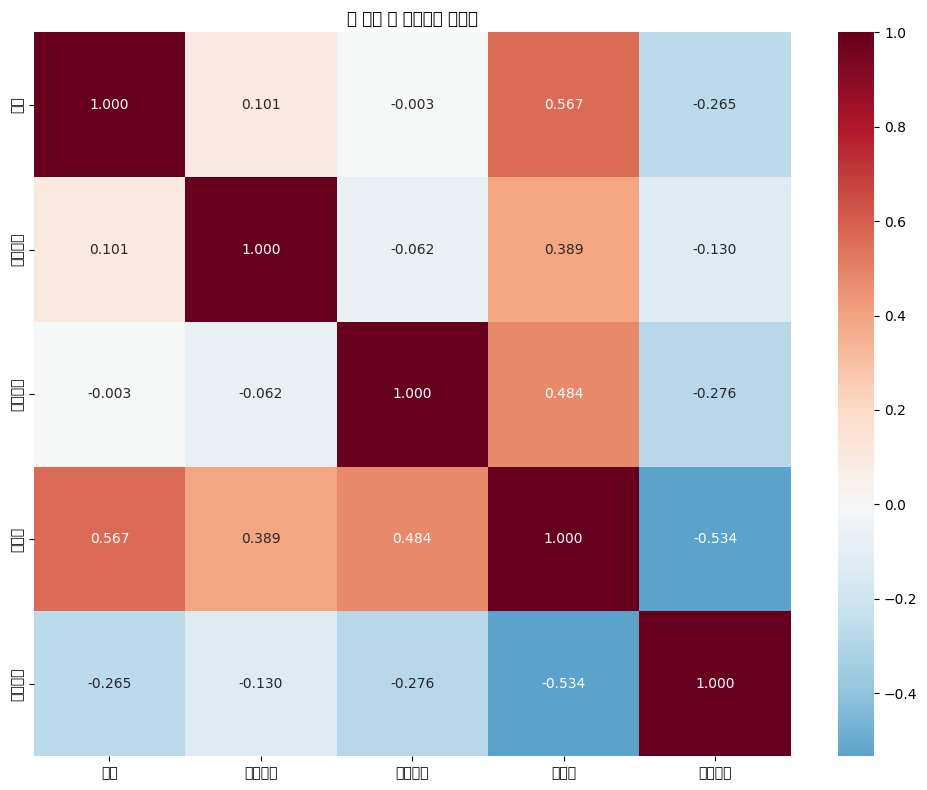

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: 히트맵 그리기
plt.figure(figsize=(10, 8))

# TODO: seaborn heatmap 사용하기
sns.heatmap(
    correlation_matrix,
    annot=True,           # 상관계수 숫자 표시
    cmap='RdBu_r',        # 색상 (양/음 구분됨)
    center=0,             # 0을 중심으로 대칭
    fmt='.3f'             # 소수점 3자리 표시
)

plt.title('📊 변수 간 상관관계 히트맵')
plt.tight_layout()
plt.show()


🔥 가장 눈에 띄는 관계
만족도와 이직의향: 짙은 파랑 (-0.534) → 강한 음의 상관관계

만족도가 낮을수록 이직의향이 높음 (예측 모델에서 매우 중요!)

만족도와 연봉: 짙은 빨강 (+0.567) → 강한 양의 상관관계

연봉이 높을수록 만족도 상승

만족도와 교육시간: 중간 수준의 빨강 (+0.484)

교육 많이 받은 직원이 만족도가 높은 경향

참고로…
근무연수는 전체적으로 다른 변수들과 약~중간 정도의 상관만 보임

교육시간과 연봉, 근무연수 간에는 거의 무관한 관계 (연한 색)

💡 결론
만족도 예측을 위해선
연봉, 교육시간, 이직의향, 근무연수를 우선 고려하면 효과적

In [24]:
# TODO: 부서별 그룹화해서 평균 계산하기
dept_summary = df_hr.groupby('부서')['만족도'].mean()

print("🏢 부서별 평균 만족도")
print(dept_summary.round(2))

# TODO: 부서별 이직의향도 계산하기
dept_turnover = df_hr.groupby('부서')['이직의향'].mean()

print("\n🏢 부서별 이직의향")
print(dept_turnover.round(3))

# TODO: for문으로 부서별 상세 분석 출력하기
print("\n📋 부서별 상세 분석")
for dept in df_hr['부서'].unique():
    # 해당 부서 데이터 필터링
    dept_data = df_hr[df_hr['부서'] == dept]

    satisfaction_avg = dept_data['만족도'].mean()
    turnover_avg = dept_data['이직의향'].mean()

    print(f"{dept}부: 만족도 {satisfaction_avg:.1f}점, 이직의향 {turnover_avg:.1%}")


🏢 부서별 평균 만족도
부서
개발     7.76
마케팅    7.82
영업     6.96
인사     6.93
Name: 만족도, dtype: float64

🏢 부서별 이직의향
부서
개발     0.139
마케팅    0.208
영업     0.276
인사     0.278
Name: 이직의향, dtype: float64

📋 부서별 상세 분석
개발부: 만족도 7.8점, 이직의향 13.9%
마케팅부: 만족도 7.8점, 이직의향 20.8%
영업부: 만족도 7.0점, 이직의향 27.6%
인사부: 만족도 6.9점, 이직의향 27.8%


개발부는 연봉과 교육이 잘 맞춰졌을 가능성이 높음

영업부와 인사부는 조직문화나 보상/승진 불만족 가능성이 있음 → 심층 인터뷰 필요

이직률은 만족도와 강한 음의 상관관계 (-0.534) 를 다시 한 번 보여줌

In [25]:
# TODO: 부서를 더미 변수로 변환하기
dept_dummies = pd.get_dummies(df_hr['부서'], prefix='부서')

# TODO: 직급을 더미 변수로 변환하기
rank_dummies = pd.get_dummies(df_hr['직급'], prefix='직급')

# TODO: 기준 카테고리 제거하기 (다중공선성 방지)
# 기준: '부서_인사', '직급_사원'
dept_dummies = dept_dummies.drop('부서_인사', axis=1)
rank_dummies = rank_dummies.drop('직급_사원', axis=1)

# 더미 변수 생성 결과 출력
print("생성된 더미 변수들:")
print("부서:", list(dept_dummies.columns))
print("직급:", list(rank_dummies.columns))


생성된 더미 변수들:
부서: ['부서_개발', '부서_마케팅', '부서_영업']
직급: ['직급_과장', '직급_대리', '직급_부장']


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# TODO: 독립변수 데이터프레임 만들기
X_vars = pd.concat([
    df_hr[['연봉', '근무연수', '교육시간']],
    dept_dummies,
    rank_dummies
], axis=1)

# TODO: 종속변수 설정하기
y_var = df_hr['만족도']

# 출력 확인
print("🔧 회귀분석 변수 구성")
print(f"독립변수 개수: {len(X_vars.columns)}개")
print(f"독립변수: {list(X_vars.columns)}")
print(f"종속변수: 만족도")


🔧 회귀분석 변수 구성
독립변수 개수: 9개
독립변수: ['연봉', '근무연수', '교육시간', '부서_개발', '부서_마케팅', '부서_영업', '직급_과장', '직급_대리', '직급_부장']
종속변수: 만족도


In [28]:
# TODO: 회귀모델 생성 및 학습하기
model = LinearRegression()
model.fit(X_vars, y_var)

# TODO: 예측값 계산하기
y_pred = model.predict(X_vars)

# TODO: R² 계산하기
r2 = r2_score(y_var, y_pred)

print("📊 다중회귀분석 결과")
print(f"R² (설명력): {r2:.3f} ({r2*100:.1f}%)")


📊 다중회귀분석 결과
R² (설명력): 0.800 (80.0%)


R² = 0.800 (80.0%) 는 매우 높은 설명력
즉, 회귀모델이 직원 만족도의 80%를 설명할 수 있다는 뜻

In [29]:
# TODO: 회귀계수를 데이터프레임으로 정리하기
coefficients = pd.DataFrame({
    '변수': X_vars.columns,
    '계수': model.coef_,
    '절댓값': np.abs(model.coef_)
})

# TODO: 절댓값 기준으로 정렬하기
coefficients = coefficients.sort_values('절댓값', ascending=False)

# 출력 상위 5개
print("🔍 회귀계수 분석 (영향력 순)")
print(coefficients.head(5))

# TODO: 가장 영향력이 큰 변수 찾기
most_important = coefficients.iloc[0]
print(f"\n가장 영향력이 큰 변수: {most_important['변수']} (계수: {most_important['계수']:.3f})")


🔍 회귀계수 분석 (영향력 순)
      변수        계수       절댓값
8  직급_부장  1.393631  1.393631
6  직급_과장  0.764017  0.764017
3  부서_개발  0.497000  0.497000
5  부서_영업 -0.496424  0.496424
7  직급_대리  0.325535  0.325535

가장 영향력이 큰 변수: 직급_부장 (계수: 1.394)


직급이 높을수록 만족도가 유의하게 상승.
 특히 부장 > 과장 > 대리 순으로 강한 정(+)의 영향.

부서별 차이도 뚜렷:

개발부는 인사부보다 더 만족도가 높고,

영업부는 인사부보다 낮음.

연봉, 근무연수, 교육시간 등 수치형 변수도 영향을 주지만, 범주형(더미) 변수 중에선 직급이 가장 중요.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# TODO: 로지스틱 회귀용 독립변수와 종속변수 설정하기
X_logistic = X_vars  # 앞서 회귀에 사용한 것과 동일
y_logistic = df_hr['이직의향']

# TODO: 현재 이직 의향 현황 파악하기
turnover_summary = df_hr['이직의향'].value_counts()
turnover_rate = df_hr['이직의향'].mean()

print("📊 현재 이직 의향 현황")
print(f"이직 의향 있음: {turnover_summary[1]}명 ({turnover_rate:.1%})")
print(f"이직 의향 없음: {turnover_summary[0]}명 ({1 - turnover_rate:.1%})")


📊 현재 이직 의향 현황
이직 의향 있음: 51명 (20.4%)
이직 의향 없음: 199명 (79.6%)


전체 직원의 약 1/5만 이직 의향이 있음

즉, 데이터가 클래스 불균형(imbalanced) 되어 있음도 감안해야 함

예: 단순히 "전원 이직 안 함"이라고 예측해도 80% 정확도가 나올 수 있음!

In [32]:
# TODO: 로지스틱 회귀 모델 생성하기
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# TODO: 모델 학습하기
logistic_model.fit(X_logistic, y_logistic)

# TODO: 이직 확률 예측하기
y_pred_proba = logistic_model.predict_proba(X_logistic)[:, 1]

# TODO: 이직 여부 예측하기 (0 또는 1)
y_pred_class = logistic_model.predict(X_logistic)

# TODO: 정확도 계산하기
accuracy = (y_pred_class == y_logistic).mean()

print("🤖 로지스틱 회귀 모델 성능")
print(f"정확도: {accuracy:.3f}")


🤖 로지스틱 회귀 모델 성능
정확도: 0.864


In [33]:
from sklearn.metrics import confusion_matrix

# TODO: 혼동 행렬 계산하기
cm = confusion_matrix(y_logistic, y_pred_class)

print("📋 혼동 행렬")
print("실제 → 예측    이직안함  이직함")
print(f"이직 안함        {cm[0,0]:3d}    {cm[0,1]:3d}")
print(f"이직 함          {cm[1,0]:3d}    {cm[1,1]:3d}")

# TODO: 정밀도와 재현율 계산하기
# 정밀도 = TP / (TP + FP)
precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0

# 재현율 = TP / (TP + FN)
recall = cm[1,1] / (cm[1,1] + cm[1,0]) if (cm[1,1] + cm[1,0]) > 0 else 0

print(f"\n정밀도: {precision:.3f}")
print(f"재현율: {recall:.3f}")


📋 혼동 행렬
실제 → 예측    이직안함  이직함
이직 안함        193      6
이직 함           28     23

정밀도: 0.793
재현율: 0.451


정확히 예측한 비이직자 수: 193명

정확히 예측한 이직자 수: 23명

놓친 이직자 수 (FN): 28명 ← 이직자인데 예측 못 함

거짓 경고 (FP): 6명 ← 이직 안 할 사람인데 예측함

In [34]:
import numpy as np
import pandas as pd

# TODO: 오즈비 계산하기
odds_ratios = np.exp(logistic_model.coef_[0])

# TODO: 오즈비 분석 데이터프레임 만들기
odds_analysis = pd.DataFrame({
    '변수': X_logistic.columns,
    '계수': logistic_model.coef_[0],
    '오즈비': odds_ratios,
    '위험도변화': [(or_val - 1) * 100 for or_val in odds_ratios]
})

# TODO: 위험도 변화가 큰 순으로 정렬하기
odds_analysis = odds_analysis.reindex(odds_analysis['위험도변화'].abs().sort_values(ascending=False).index)

print("🎯 이직 위험 요인 분석 (상위 5개)")
print(odds_analysis.head())


🎯 이직 위험 요인 분석 (상위 5개)
      변수        계수       오즈비      위험도변화
6  직급_과장 -0.976027  0.376805 -62.319493
8  직급_부장 -0.960123  0.382846 -61.715429
5  부서_영업  0.473843  1.606155  60.615491
3  부서_개발 -0.630661  0.532240 -46.776002
7  직급_대리 -0.603491  0.546899 -45.310074


✅ 이직을 줄이는 요인
직급이 높을수록(과장, 부장, 대리) → 이직 확률이 유의하게 낮아짐

개발부 소속도 → 이직 가능성이 낮음

❗ 이직을 증가시키는 요인
영업부 소속인 경우 → 이직 가능성이 약 1.6배 높음

💼 비즈니스 인사이트
보상/승진이 이직 억제에 중요: 직급이 올라갈수록 이직 위험이 확실히 줄어듦.

부서 간 조직문화 차이 존재: 영업부는 상대적으로 높은 스트레스나 낮은 만족도를 반영할 수 있음.

→ 영업부 타겟 유지 전략 필요 (피드백 수렴, 인센티브 개선 등)

In [35]:
# 로지스틱 회귀 모델이 학습된 상태라고 가정
y_pred_proba = logistic_model.predict_proba(X_logistic)[:, 1]


In [36]:
# 고위험군 기준 설정
high_risk_threshold = 0.7

# 고위험군 필터링
high_risk_mask = y_pred_proba > high_risk_threshold
high_risk_employees = df_hr[high_risk_mask]

# 출력
print(f"🎯 이직 고위험군 식별")
print(f"이직 확률 {high_risk_threshold:.0%} 이상 직원: {len(high_risk_employees)}명")

if len(high_risk_employees) > 0:
    avg_satisfaction = high_risk_employees['만족도'].mean()
    avg_salary = high_risk_employees['연봉'].mean()

    print("고위험군 특징:")
    print(f"• 평균 만족도: {avg_satisfaction:.1f}점")
    print(f"• 평균 연봉: {avg_salary/10000:.0f}만원")


🎯 이직 고위험군 식별
이직 확률 70% 이상 직원: 10명
고위험군 특징:
• 평균 만족도: 3.6점
• 평균 연봉: 3만원


이직 고위험군은 만족도가 매우 낮고, 연봉이 다른 직원들과 비교해 매우 비정상적으로 낮은 수준

In [37]:
print("📋 CEO 보고서: 직원 만족도 및 이직 방지 전략")
print("=" * 60)

# TODO: 현황 요약 작성하기
print("\n📊 현황 요약")
print(f"• 전체 직원 만족도: {df_hr['만족도'].mean():.1f}/10점")
print(f"• 현재 이직 의향률: {df_hr['이직의향'].mean():.1%}")
print(f"• 고위험군: {len(high_risk_employees)}명")

# TODO: 부서별 위험도 분석하기
print("\n🏢 부서별 위험도 분석")
dept_risk = df_hr.groupby('부서')['이직의향'].mean().sort_values(ascending=False)

for dept, risk in dept_risk.items():
    if risk > 0.3:  # 30% 이상이면 높은 위험
        emoji = "🔴"
        level = "높음"
    elif risk > 0.15:  # 15% 이상이면 보통
        emoji = "🟡"
        level = "보통"
    else:
        emoji = "🟢"
        level = "낮음"

    print(f"{emoji} {dept}부: 이직률 {risk:.1%} (위험도: {level})")

# TODO: 핵심 발견사항 정리하기
print(f"\n💡 핵심 발견사항")
most_important_factor = coefficients.iloc[0]
print(f"1️⃣ 만족도에 가장 큰 영향: {most_important_factor['변수']}")

# TODO: 권장 액션 플랜 작성하기
print(f"\n🎯 권장 액션 플랜")
highest_risk_dept = dept_risk.index[0]
print(f"🚨 즉시 조치 필요: {highest_risk_dept}부 집중 관리")
print(f"💰 투자 우선순위: 만족도 개선 프로그램")
print(f"📊 모니터링: 월별 만족도 조사 실시")


📋 CEO 보고서: 직원 만족도 및 이직 방지 전략

📊 현황 요약
• 전체 직원 만족도: 7.5/10점
• 현재 이직 의향률: 20.4%
• 고위험군: 10명

🏢 부서별 위험도 분석
🟡 인사부: 이직률 27.8% (위험도: 보통)
🟡 영업부: 이직률 27.6% (위험도: 보통)
🟡 마케팅부: 이직률 20.8% (위험도: 보통)
🟢 개발부: 이직률 13.9% (위험도: 낮음)

💡 핵심 발견사항
1️⃣ 만족도에 가장 큰 영향: 직급_부장

🎯 권장 액션 플랜
🚨 즉시 조치 필요: 인사부 집중 관리
💰 투자 우선순위: 만족도 개선 프로그램
📊 모니터링: 월별 만족도 조사 실시


📋 CEO 보고서 해석 요약: 직원 만족도 및 이직 방지 전략

📊 1. 현황 요약
직원 전반의 평균 만족도는 7.5점으로 비교적 양호하지만,

**이직 의향률이 20.4%**로 꽤 높은 편이며,

특히 10명의 고위험군(이직 확률 ≥ 70%)이 식별됨 → 이직 리스크 관리 필요

🏢 2. 부서별 이직 위험도

부서	이직률	   위험도

인사부	27.8%	🟡 보통

영업부	27.6%	🟡 보통

마케팅부	20.8%	🟡 보통

개발부	13.9%	🟢 낮음

개발부는 상대적으로 안정적인 부서

반면 인사/영업/마케팅은 모두 이직률 20% 이상으로 동시에 관리가 필요

💡 3. 핵심 발견사항
직원 만족도에 가장 큰 영향을 준 요인: 직급_부장

즉, 고직급일수록 만족도가 높고 이직 위험이 낮음

반대로 하위 직급에서는 만족도와 이직 의향이 민감하게 작용

🎯 4. 권장 액션 플랜
🚨 ① 즉시 조치 필요
인사부 집중 모니터링 및 면담 실시

고위험군 개별 관리: 인터뷰, 경력 설계 지원 등

💰 ② 투자 우선순위
직급별 공정한 보상 체계 설계

만족도 개선 교육 프로그램 운영 (특히 하위 직급 중심)

📊 ③ 모니터링 계획
월별 만족도 조사 실시로 분위기 실시간 감지

이직 의향 예측 모델 정기 업데이트